In [1]:
import numpy as np
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.expand_frame_repr', False)
import warnings
warnings.filterwarnings('ignore')


In [3]:
claims_data = pd.read_csv("Fianl_claims_data.csv")

In [5]:
claims_data.sample(5)

,Claimant Unique ID,Unique Member Reference,Claim ID,Incurred Date,Paid Date,Condition Code,Impairment Code,Condition Category,Treatment Type,Claim Type,Ancillary Service Type,Treatment Location,Provider Type,Admission Date,Discharge Date,Calculate Length of Service,Claim Amount,Amount Paid,Industry,Client Name,Client Identifier,Scheme Category/ Section Name,Scheme Category/ Section Name Identifier,Status of Member,Year of Birth,Gender,Short Post Code,Contract Start Date,Contract End Date,Age
106000,EMP00009032-04,EMP00009032,CLM00049845,04/04/2021,03/05/2021,G43.9,IMP-NEU-802,Neurology,Surgical,Outpatient,Diagnostic Imaging,England,Hospital,NaN,NaN,0,3550.91,3500.89,IT,Accenture,CLI000001,Essential Cover,SCH0008,Dependent,1961,Male,NE2,17-07-2020,05-01-2022,60
82646,EMP00007030-02,EMP00007030,CLM00005349,15/12/2018,19/01/2019,M75.1,IMP-MSK-960,Musculoskeletal,Surgical,Outpatient,Physiotherapy,England,Rehab Center,NaN,NaN,0,1347.91,1318.10,IT,Capita,CLI000003,Essential Cover,SCH0008,Dependent,1960,Female,CF11,30-03-2018,05-07-2019,58
107808,EMP00009202-03,EMP00009202,CLM00023497,17/04/2018,15/05/2018,I48.0,IMP-CVD-102,Cardiovascular,Medical,Day Case,NaN,Scotland,Clinic,17/04/2018,17/04/2018,1,7549.91,6511.77,IT,Capita,CLI000003,Gold Plan,SCH0007,Dependent,1941,Male,M1,30-11-2017,17-05-2019,77
47833,EMP00003978-02,EMP00003978,CLM00038034,18/11/2018,07/12/2018,R07.4,IMP-GEN-330,Other,Diagnostic,Cash Benefit,NaN,England,Hospital,NaN,NaN,0,587.65,557.22,Textile,Carrington Textiles,CLI000015,Essential Cover,SCH0008,Partner,1992,Female,BS2,19-02-2017,17-06-2019,26
84097,EMP00007139-02,EMP00007139,CLM00057912,11/12/2018,19/12/2018,E78.5,IMP-END-520,Endocrine,Medical,Outpatient,Pathology Tests,England,Clinic,NaN,NaN,0,3027.40,2831.83,Manufacturing,CNH Industrial,CLI000009,Platinum Plan,SCH0011,Dependent,1958,Male,CF10,25-10-2018,10-10-2021,60


In [6]:
claims_data['Condition Category'].unique()

array(['Musculoskeletal', 'Respiratory', 'Other', 'Gynaecology',
       'Oncology', 'Ophthalmology', 'Cardiovascular', 'Dermatology',
       'Neurology', 'Urology', 'Mental Health', 'Digestive', 'ENT',
       'Endocrine', 'Rheumatology', 'Orthopaedics', 'Maternity',
       'Haematology', 'Gastroenterology'], dtype=object)

In [7]:
memebrship_data = pd.read_csv("health_insurance_membership_10k_corrected_age.csv")

In [8]:

claims_data['Incurred Date'] = pd.to_datetime(claims_data['Incurred Date'], errors='coerce', dayfirst=True)
claims_data['Contract Start Date'] = pd.to_datetime(claims_data['Contract Start Date'], errors='coerce', dayfirst=True)
claims_data['Contract End Date'] = pd.to_datetime(claims_data['Contract End Date'], errors='coerce', dayfirst=True)
claims_data['Paid Date'] = pd.to_datetime(claims_data['Paid Date'], errors='coerce', dayfirst=True)
claims_data['Admission Date'] = pd.to_datetime(claims_data['Admission Date'], errors='coerce', dayfirst=True)
claims_data['Discharge Date'] = pd.to_datetime(claims_data['Discharge Date'], errors='coerce', dayfirst=True)
print(claims_data.dtypes)

Claimant Unique ID                                  object
Unique Member Reference                             object
Claim ID                                            object
Incurred Date                               datetime64[ns]
Paid Date                                   datetime64[ns]
Condition Code                                      object
Impairment Code                                     object
Condition Category                                  object
Treatment Type                                      object
Claim Type                                          object
Ancillary Service Type                              object
Treatment Location                                  object
Provider Type                                       object
Admission Date                              datetime64[ns]
Discharge Date                              datetime64[ns]
Calculate Length of Service                          int64
Claim Amount                                       float

In [9]:
claims_data['Incurred year'] = claims_data['Incurred Date'].dt.year
claims_data['Incurred month'] = claims_data['Incurred Date'].dt.month
claims_data['Incurred quarter'] = claims_data['Incurred Date'].dt.quarter

In [10]:
claims_data.columns

Index(['Claimant Unique ID', 'Unique Member Reference', 'Claim ID',
       'Incurred Date', 'Paid Date', 'Condition Code', 'Impairment Code',
       'Condition Category', 'Treatment Type', 'Claim Type',
       'Ancillary Service Type', 'Treatment Location', 'Provider Type',
       'Admission Date', 'Discharge Date', 'Calculate Length of Service',
       'Claim Amount', 'Amount Paid', 'Industry', 'Client Name',
       'Client Identifier', 'Scheme Category/ Section Name',
       'Scheme Category/ Section Name Identifier', 'Status of Member',
       'Year of Birth', 'Gender', 'Short Post Code', 'Contract Start Date',
       'Contract End Date', 'Age', 'Incurred year', 'Incurred month',
       'Incurred quarter'],
      dtype='object')

In [11]:
subset_claims_data = claims_data[['Industry','Claimant Unique ID', 'Unique Member Reference','Incurred Date','Age', 'Gender', 'Short Post Code','Claim Amount','Year of Birth']]

In [12]:
subset_claims_data.shape

(116437, 9)

In [13]:
import pandas as pd
import numpy as np

def build_member_month_panel(
    df: pd.DataFrame,
    start_month: str = "2018-01",
    end_month: str = "2024-12",
    member_id_col: str = "Unique Member Reference",
):


    df = df.copy()

    expected_cols = [
        "Industry", "Claimant Unique ID", "Unique Member Reference",
        "Incurred Date", "Age", "Gender", "Short Post Code", "Claim Amount","Year of Birth"
    ]
    missing = [c for c in expected_cols if c not in df.columns]
    if missing:
        raise ValueError(f"Missing required columns: {missing}")

    df["Incurred Date"] = pd.to_datetime(df["Incurred Date"], errors="coerce")
    df["Claim Amount"] = pd.to_numeric(df["Claim Amount"], errors="coerce").fillna(0)
    df["Age"] = pd.to_numeric(df["Age"], errors="coerce")
    df["Year of Birth"] = pd.to_numeric(df["Year of Birth"], errors="coerce")
    df["Gender"] = df["Gender"].astype(str).where(df["Gender"].notna(), None)
    df["Short Post Code"] = df["Short Post Code"].astype(str).where(df["Short Post Code"].notna(), None)
    df["Industry"] = df["Industry"].astype(str).where(df["Industry"].notna(), None)
    df["Claimant Unique ID"] = df["Claimant Unique ID"].astype(str).where(df["Claimant Unique ID"].notna(), None)
    df["Month"] = df["Incurred Date"].dt.to_period("M")

    months = pd.period_range(start=start_month, end=end_month, freq="M")
    members = (
        df[member_id_col]
        .dropna()
        .unique()
    )
    grid = pd.MultiIndex.from_product([members, months], names=[member_id_col, "Month"])
    panel = grid.to_frame(index=False)

    df_sorted = df.sort_values(["Incurred Date", member_id_col])

    def first_valid(s):
        s2 = s.dropna()
        return s2.iloc[0] if len(s2) > 0 else np.nan

    static_cols = ["Industry", "Claimant Unique ID", "Age", "Gender", "Short Post Code","Year of Birth"]
    static_info = (
        df_sorted
        .groupby(member_id_col)
        .agg({col: first_valid for col in static_cols})
        .reset_index()
    )

    def earliest_date(s):
        s2 = s.dropna()
        return s2.min() if len(s2) > 0 else pd.NaT
    monthly_claims = (
        df[df["Month"].notna()]
        .groupby([member_id_col, "Month"], as_index=False)
        .agg({
            "Claim Amount": "sum",
            "Incurred Date": earliest_date,  
        })
    )
    panel = (
        panel
        .merge(monthly_claims, on=[member_id_col, "Month"], how="left")
        .merge(static_info, on=member_id_col, how="left")
    )

    panel["Claim Amount"] = panel["Claim Amount"].fillna(0)
    panel["Incurred Date"] = panel["Incurred Date"].astype("datetime64[ns]")
    panel["Month"] = panel["Month"].astype(str) 


    final_cols = [
        "Industry", "Claimant Unique ID", "Unique Member Reference",
        "Age", "Gender", "Short Post Code",
        "Month", "Claim Amount", "Incurred Date","Year of Birth"
    ]
  
    if member_id_col != "Unique Member Reference":
        
        final_cols[2] = member_id_col

    panel = panel[final_cols].sort_values([member_id_col, "Month"]).reset_index(drop=True)
    return panel


if __name__ == "__main__":
     
    panel_df = build_member_month_panel(subset_claims_data)
    pass


In [14]:
panel_df.shape

(645456, 10)

In [15]:
subset_claims_data.sample(2)

,Industry,Claimant Unique ID,Unique Member Reference,Incurred Date,Age,Gender,Short Post Code,Claim Amount,Year of Birth
13429,Pharmaceutical,EMP00001177-01,EMP00001177,2022-10-20,54,Female,M1,37688.6,1968
81853,IT,EMP00006946-02,EMP00006946,2023-07-21,41,Male,M1,6983.0,1982


In [16]:
panel_df[panel_df['Claimant Unique ID'] == 'EMP00005979-02']

,Industry,Claimant Unique ID,Unique Member Reference,Age,Gender,Short Post Code,Month,Claim Amount,Incurred Date,Year of Birth
385896,IT,EMP00005979-02,EMP00005979,54,Female,CF10,2018-01,815.37,2018-01-19,1963
385897,IT,EMP00005979-02,EMP00005979,54,Female,CF10,2018-02,8224.62,2018-02-01,1963
385898,IT,EMP00005979-02,EMP00005979,54,Female,CF10,2018-03,6914.47,2018-03-11,1963
385899,IT,EMP00005979-02,EMP00005979,54,Female,CF10,2018-04,11317.01,2018-04-19,1963
385900,IT,EMP00005979-02,EMP00005979,54,Female,CF10,2018-05,2793.70,2018-05-11,1963
385901,IT,EMP00005979-02,EMP00005979,54,Female,CF10,2018-06,4122.11,2018-06-05,1963
385902,IT,EMP00005979-02,EMP00005979,54,Female,CF10,2018-07,4232.64,2018-07-22,1963
385903,IT,EMP00005979-02,EMP00005979,54,Female,CF10,2018-08,12013.77,2018-08-09,1963
385904,IT,EMP00005979-02,EMP00005979,54,Female,CF10,2018-09,11302.22,2018-09-12,1963
385905,IT,EMP00005979-02,EMP00005979,54,Female,CF10,2018-10,13134.83,2018-10-06,1963


In [17]:
panel_df[panel_df['Unique Member Reference'] == 'EMP00005979'].head(5)

,Industry,Claimant Unique ID,Unique Member Reference,Age,Gender,Short Post Code,Month,Claim Amount,Incurred Date,Year of Birth
385896,IT,EMP00005979-02,EMP00005979,54,Female,CF10,2018-01,815.37,2018-01-19,1963
385897,IT,EMP00005979-02,EMP00005979,54,Female,CF10,2018-02,8224.62,2018-02-01,1963
385898,IT,EMP00005979-02,EMP00005979,54,Female,CF10,2018-03,6914.47,2018-03-11,1963
385899,IT,EMP00005979-02,EMP00005979,54,Female,CF10,2018-04,11317.01,2018-04-19,1963
385900,IT,EMP00005979-02,EMP00005979,54,Female,CF10,2018-05,2793.70,2018-05-11,1963


In [18]:
import pandas as pd
import numpy as np

def sum_by_year_wide(df: pd.DataFrame) -> pd.DataFrame:
    

    df = df.copy()
    df['Claim Amount'] = pd.to_numeric(df['Claim Amount'], errors='coerce').fillna(0)
    month_col = df['Month']

    if pd.api.types.is_string_dtype(month_col):
        year_from_month = pd.to_datetime(month_col, errors='coerce', format='%Y-%m').dt.year
    elif pd.api.types.is_period_dtype(month_col):
        year_from_month = month_col.dt.year
    else:
        year_from_month = pd.to_datetime(month_col, errors='coerce').dt.year

    year_from_date = pd.to_datetime(df.get('Incurred Date'), errors='coerce').dt.year
    df['Year'] = year_from_month.fillna(year_from_date)

    df = df[df['Year'].between(2018, 2024)]

    static_cols = ['Industry', 'Gender', 'Short Post Code','Age']

    def first_valid(s):
        s2 = s.dropna()
        return s2.iloc[0] if len(s2) > 0 else np.nan

    static = (
        df.sort_values(['Unique Member Reference', 'Year'])
          .groupby('Unique Member Reference', as_index=False)
          .agg({col: first_valid for col in static_cols})
    )

    yearly = (
        df.groupby(['Unique Member Reference', 'Year'], as_index=False)['Claim Amount']
          .sum()
    )

    wide = yearly.pivot(index='Unique Member Reference', columns='Year', values='Claim Amount')

    years = list(range(2018, 2025))
    for y in years:
        if y not in wide.columns:
            wide[y] = 0.0
    wide = wide[years].fillna(0)

    wide.columns = [f'sum_claim_amnt_{y}' for y in wide.columns]

    out = (
        static.merge(wide.reset_index(), on='Unique Member Reference', how='left')
              .sort_values('Unique Member Reference')
              .reset_index(drop=True)
    )

    sum_cols = [c for c in out.columns if c.startswith('sum_claim_amnt_')]

    return out

result = sum_by_year_wide(panel_df)


In [19]:
result.sample(10)

,Unique Member Reference,Industry,Gender,Short Post Code,Age,sum_claim_amnt_2018,sum_claim_amnt_2019,sum_claim_amnt_2020,sum_claim_amnt_2021,sum_claim_amnt_2022,sum_claim_amnt_2023,sum_claim_amnt_2024
6867,EMP00008896,Pharmaceutical,Male,NE1,59,28605.87,225310.92,153104.78,0.00,0.00,0.00,0.0
6706,EMP00008692,Chemical,Male,CF11,17,0.00,0.00,0.00,4047.73,7844.02,0.00,0.0
925,EMP00001190,Pharmaceutical,Female,B1,27,0.00,0.00,15993.32,7268.64,0.00,0.00,0.0
6665,EMP00008634,Manufacturing,Male,B1,44,0.00,0.00,12241.93,45785.92,2883.66,0.00,0.0
1846,EMP00002375,Pharmaceutical,Female,G2,37,45251.55,9918.71,0.00,0.00,0.00,0.00,0.0
2817,EMP00003678,Manufacturing,Male,L1,60,0.00,0.00,0.00,416358.93,736620.20,535285.47,0.0
7411,EMP00009630,Manufacturing,Male,BS2,42,193295.02,421219.49,73185.66,0.00,0.00,0.00,0.0
7124,EMP00009235,Pharmaceutical,Female,CF10,27,0.00,0.00,0.00,0.00,4112.68,0.00,0.0
3359,EMP00004375,IT,Male,L1,32,0.00,553.46,3831.73,0.00,0.00,0.00,0.0
52,EMP00000058,IT,Female,BS2,48,0.00,0.00,0.00,52933.84,35256.94,0.00,0.0


In [20]:
result.shape

(7684, 12)

In [21]:
for i in range(18,25):
    print(f"result for year {i}", result[result[f'sum_claim_amnt_20{i}'] > 0].shape)

result for year 18 (2084, 12)
result for year 19 (3219, 12)
result for year 20 (3583, 12)
result for year 21 (3570, 12)
result for year 22 (2856, 12)
result for year 23 (1511, 12)
result for year 24 (419, 12)


In [22]:
result = result[['Unique Member Reference', 'Industry', 'Gender', 'Short Post Code',
       'Age', 'sum_claim_amnt_2018', 'sum_claim_amnt_2019',
       'sum_claim_amnt_2020', 'sum_claim_amnt_2021', 'sum_claim_amnt_2022',
       'sum_claim_amnt_2023']]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000758 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1410
[LightGBM] [Info] Number of data points in the train set: 5378, number of used features: 34
[LightGBM] [Info] Start training from score 16205.972965
LightGBM RMSE: 75083.68348382073
LightGBM R²: 0.2432131684973814
XGBoost RMSE: 84960.36022275694
XGBoost R²: 0.031019323945873034


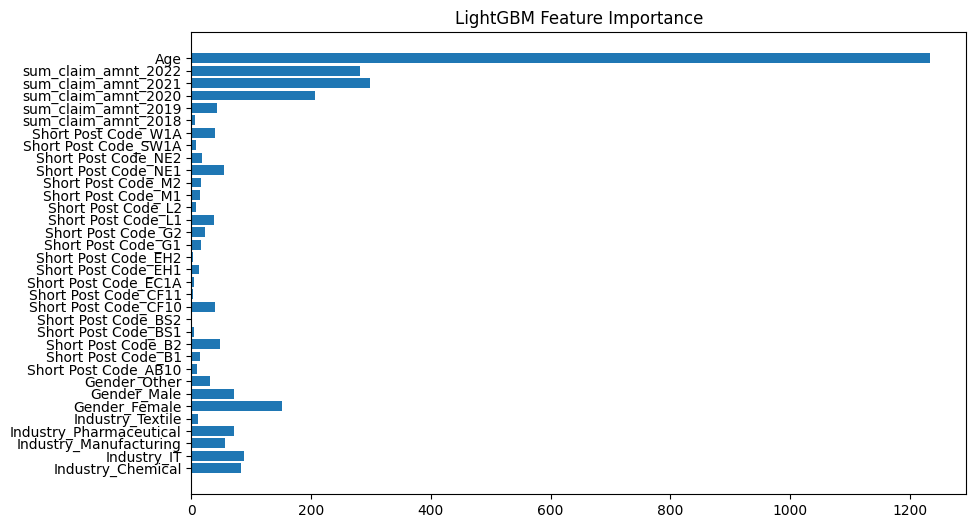

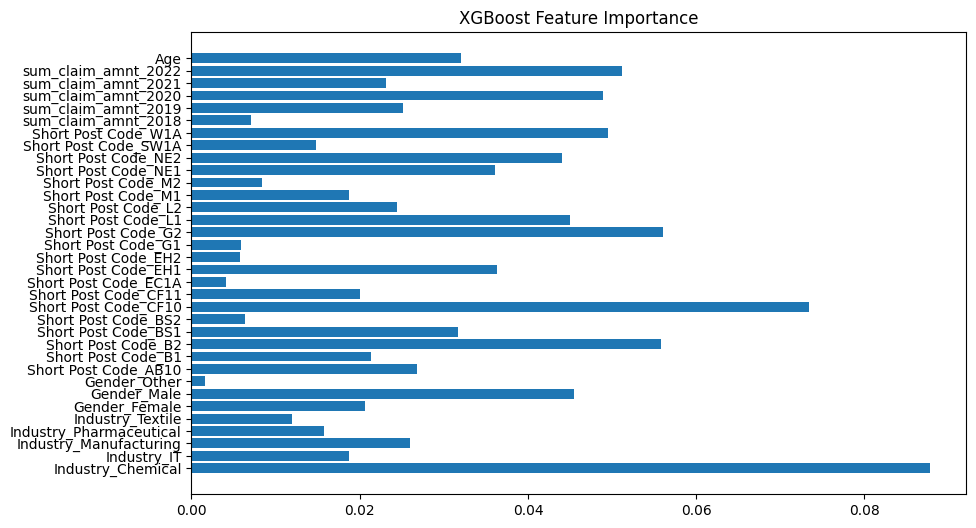

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error, r2_score
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

# Load your dataset
df = result

# Step 1: Handle outliers using IQR method
claim_cols = ['sum_claim_amnt_2018','sum_claim_amnt_2019','sum_claim_amnt_2020',
              'sum_claim_amnt_2021','sum_claim_amnt_2022']
for col in claim_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    q10 = df[col].quantile(0.10)
    q90 = df[col].quantile(0.90)
    df[col] = df[col].apply(lambda x: q10 if x < lower_bound else (q90 if x > upper_bound else x))

# Step 2: One-hot encode categorical columns
categorical_cols = ['Industry','Gender','Short Post Code']
df_encoded = pd.get_dummies(df[categorical_cols])

# Step 3: Combine features
X = pd.concat([df_encoded, df[claim_cols + ['Age']]], axis=1)
y = df['sum_claim_amnt_2023']

# Step 4: Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 5: Train LightGBM
lgb_model = LGBMRegressor(random_state=42)
lgb_model.fit(X_train, y_train)
lgb_pred = lgb_model.predict(X_test)

# Step 6: Train XGBoost
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

# Step 7: Evaluate
print("LightGBM RMSE:", root_mean_squared_error(y_test, lgb_pred))
print("LightGBM R²:", r2_score(y_test, lgb_pred))
print("XGBoost RMSE:", root_mean_squared_error(y_test, xgb_pred))
print("XGBoost R²:", r2_score(y_test, xgb_pred))

# Step 8: Feature importance visualization
plt.figure(figsize=(10,6))
plt.barh(X.columns, lgb_model.feature_importances_)
plt.title("LightGBM Feature Importance")
plt.show()

plt.figure(figsize=(10,6))
plt.barh(X.columns, xgb_model.feature_importances_)
plt.title("XGBoost Feature Importance")
plt.show()

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000266 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1222
[LightGBM] [Info] Number of data points in the train set: 3585, number of used features: 33
[LightGBM] [Info] Start training from score 16435.059301
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000246 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1221
[LightGBM] [Info] Number of data points in the train set: 3585, number of used features: 34
[LightGBM] [Info] Start training from score 16161.700946
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead

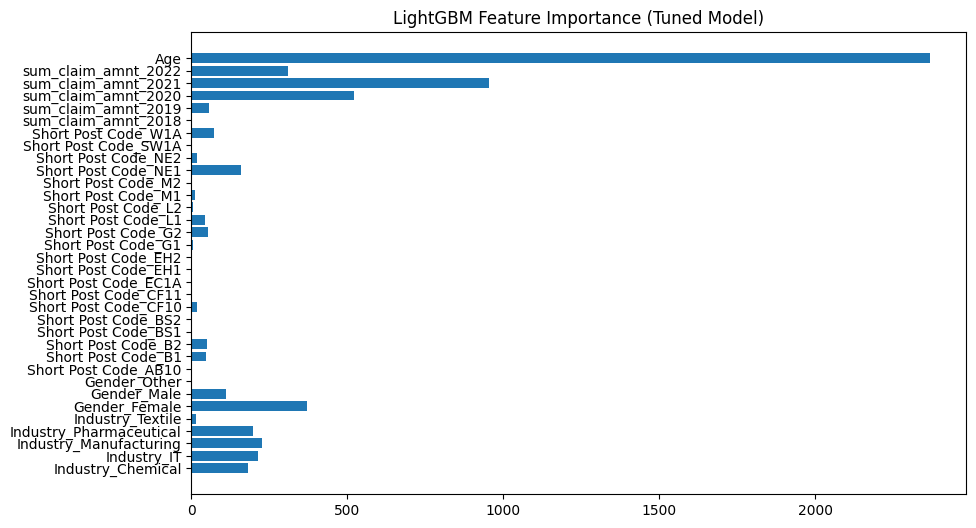

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, root_mean_squared_error
from lightgbm import LGBMRegressor
import matplotlib.pyplot as plt



# Step 5: Hyperparameter tuning for LightGBM
param_grid = {
    'num_leaves': [31, 50, 70],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 500]
}

lgb_model = LGBMRegressor(random_state=42)
grid_search = GridSearchCV(estimator=lgb_model, param_grid=param_grid, cv=3, scoring='r2')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Step 6: Evaluate tuned model
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Best Parameters:", grid_search.best_params_)
print(f"RMSE: {rmse:.2f}, R²: {r2:.2f}")

# Step 7: Feature importance visualization
importances = best_model.feature_importances_
plt.figure(figsize=(10,6))
plt.barh(X.columns, importances)
plt.title("LightGBM Feature Importance (Tuned Model)")
plt.show()

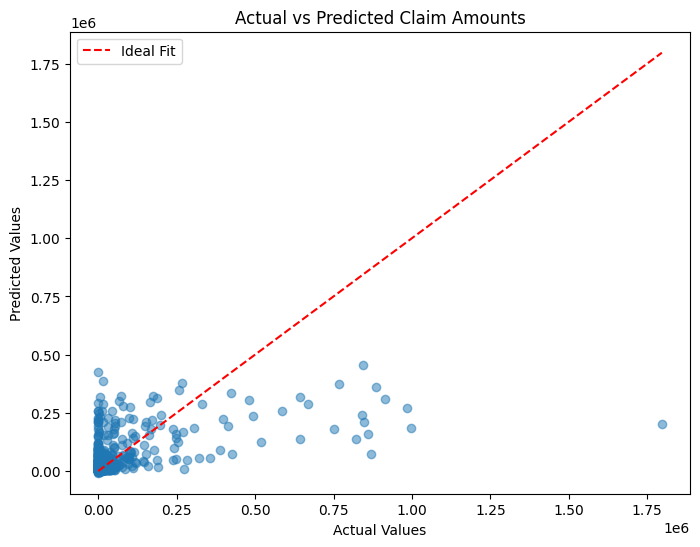

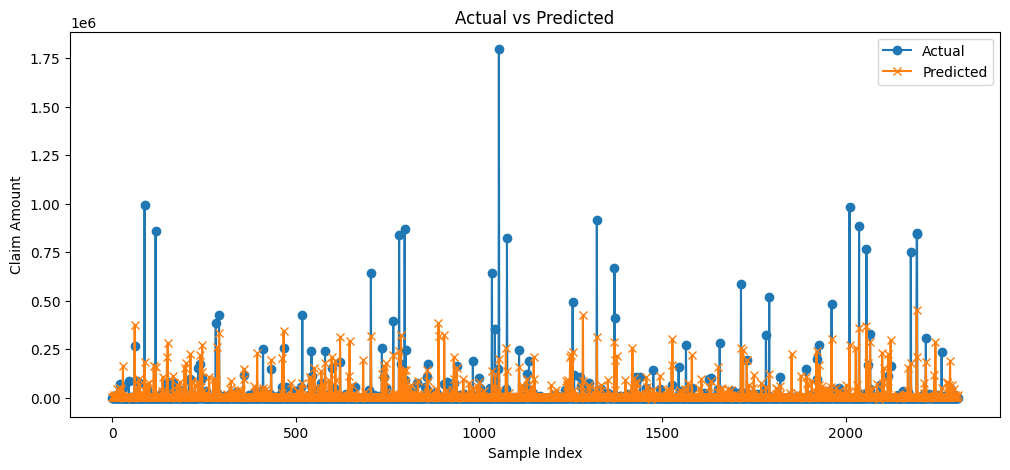

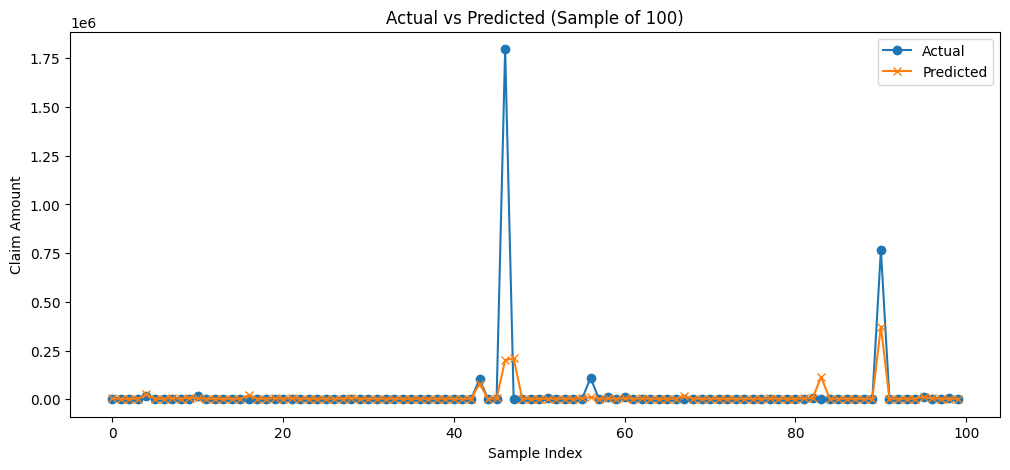

In [27]:

# Predict on test set
y_pred = best_model.predict(X_test)

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred
})

# Plot actual vs predicted values (scatter plot)
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(comparison_df['Actual'], comparison_df['Predicted'], alpha=0.5)
plt.plot([comparison_df['Actual'].min(), comparison_df['Actual'].max()],
         [comparison_df['Actual'].min(), comparison_df['Actual'].max()],
         color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Claim Amounts')
plt.legend()
plt.show()

# Optionally, plot actual and predicted values
comparison_df_sample = comparison_df.sort_index()
plt.figure(figsize=(12, 5))
plt.plot(comparison_df_sample['Actual'].values, label='Actual', marker='o')
plt.plot(comparison_df_sample['Predicted'].values, label='Predicted', marker='x')
plt.title('Actual vs Predicted')
plt.xlabel('Sample Index')
plt.ylabel('Claim Amount')
plt.legend()
plt.show()

# Optionally, plot actual and predicted values for a sample
comparison_df_sample = comparison_df.sample(100).sort_index()
plt.figure(figsize=(12, 5))
plt.plot(comparison_df_sample['Actual'].values, label='Actual', marker='o')
plt.plot(comparison_df_sample['Predicted'].values, label='Predicted', marker='x')
plt.title('Actual vs Predicted (Sample of 100)')
plt.xlabel('Sample Index')
plt.ylabel('Claim Amount')
plt.legend()
plt.show()


In [28]:
## Data creation for quater wise

import pandas as pd
import numpy as np

def sum_by_quarter_wide(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    df['Claim Amount'] = pd.to_numeric(df['Claim Amount'], errors='coerce').fillna(0)
    month_col = df['Month']

    # Extract year and month
    if pd.api.types.is_string_dtype(month_col):
        date_parsed = pd.to_datetime(month_col, errors='coerce', format='%Y-%m')
    elif pd.api.types.is_period_dtype(month_col):
        date_parsed = month_col.to_timestamp()
    else:
        date_parsed = pd.to_datetime(month_col, errors='coerce')

    # Fallback to Incurred Date if Month is missing
    if date_parsed.isna().all():
        date_parsed = pd.to_datetime(df.get('Incurred Date'), errors='coerce')

    df['Year'] = date_parsed.dt.year
    df['Quarter'] = date_parsed.dt.quarter

    # Filter years between 2018 and 2024
    df = df[df['Year'].between(2018, 2023)]

    static_cols = ['Industry', 'Gender', 'Short Post Code', 'Age']

    def first_valid(s):
        s2 = s.dropna()
        return s2.iloc[0] if len(s2) > 0 else np.nan

    # Static info per member
    static = (
        df.sort_values(['Unique Member Reference', 'Year'])
          .groupby('Unique Member Reference', as_index=False)
          .agg({col: first_valid for col in static_cols})
    )

    # Aggregate by year and quarter
    quarterly = (
        df.groupby(['Unique Member Reference', 'Year', 'Quarter'], as_index=False)['Claim Amount']
          .sum()
    )

    # Pivot to wide format
    quarterly['Quarter_Label'] = quarterly.apply(lambda x: f"Q{x['Quarter']}_{x['Year']}", axis=1)
    wide = quarterly.pivot(index='Unique Member Reference', columns='Quarter_Label', values='Claim Amount')

    # Ensure all quarters exist for each year
    all_quarters = [f"Q{q}_{y}" for y in range(2018, 2024) for q in range(1, 5)]
    for col in all_quarters:
        if col not in wide.columns:
            wide[col] = 0.0

    wide = wide[all_quarters].fillna(0)
    wide.columns = [f'sum_claim_amnt_{col}' for col in wide.columns]

    # Merge static info
    out = (
        static.merge(wide.reset_index(), on='Unique Member Reference', how='left')
              .sort_values('Unique Member Reference')
              .reset_index(drop=True)
    )

    return out

In [29]:
quarter_wise_result = sum_by_quarter_wide(panel_df)

In [30]:
quarter_wise_result.sample(5)

,Unique Member Reference,Industry,Gender,Short Post Code,Age,sum_claim_amnt_Q1_2018,sum_claim_amnt_Q2_2018,sum_claim_amnt_Q3_2018,sum_claim_amnt_Q4_2018,sum_claim_amnt_Q1_2019,sum_claim_amnt_Q2_2019,sum_claim_amnt_Q3_2019,sum_claim_amnt_Q4_2019,sum_claim_amnt_Q1_2020,sum_claim_amnt_Q2_2020,sum_claim_amnt_Q3_2020,sum_claim_amnt_Q4_2020,sum_claim_amnt_Q1_2021,sum_claim_amnt_Q2_2021,sum_claim_amnt_Q3_2021,sum_claim_amnt_Q4_2021,sum_claim_amnt_Q1_2022,sum_claim_amnt_Q2_2022,sum_claim_amnt_Q3_2022,sum_claim_amnt_Q4_2022,sum_claim_amnt_Q1_2023,sum_claim_amnt_Q2_2023,sum_claim_amnt_Q3_2023,sum_claim_amnt_Q4_2023
3961,EMP00005148,Pharmaceutical,Male,EH2,15,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3322.40,0.00,857.18,507.14,0.00,0.00,0.00,0.0,0.0,0.0
6537,EMP00008472,Pharmaceutical,Male,SW1A,73,0.0,32629.84,11831.38,67349.47,32609.82,40041.36,33445.07,16775.39,83317.57,13145.60,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0
274,EMP00000348,Pharmaceutical,Male,BS1,34,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6179.49,2716.49,0.00,0.00,0.00,0.00,0.00,3569.06,0.00,0.00,0.00,0.0,0.0,0.0
966,EMP00001245,Chemical,Female,B2,21,0.0,0.00,0.00,0.00,0.00,5617.37,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0
65,EMP00000074,Pharmaceutical,Male,EH1,41,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,9594.30,8134.24,2725.52,5403.68,13542.59,12224.82,7383.99,8320.77,2308.56,13241.71,12604.24,2670.31,766.12,0.0,0.0,0.0


In [31]:
q1_cols = [col for col in quarter_wise_result.columns if 'sum_claim_amnt_Q1_' in col]
q2_cols = [col for col in quarter_wise_result.columns if 'sum_claim_amnt_Q2_' in col]
q3_cols = [col for col in quarter_wise_result.columns if 'sum_claim_amnt_Q3_' in col]
q4_cols = [col for col in quarter_wise_result.columns if 'sum_claim_amnt_Q4_' in col]


In [32]:
q1_cols

['sum_claim_amnt_Q1_2018',
 'sum_claim_amnt_Q1_2019',
 'sum_claim_amnt_Q1_2020',
 'sum_claim_amnt_Q1_2021',
 'sum_claim_amnt_Q1_2022',
 'sum_claim_amnt_Q1_2023']

Features (X) head:
   Industry_Chemical  Industry_IT  Industry_Manufacturing  Industry_Pharmaceutical  Industry_Textile  Gender_Female  Gender_Male  Gender_Other  Short Post Code_AB10  Short Post Code_B1  Short Post Code_B2  Short Post Code_BS1  Short Post Code_BS2  Short Post Code_CF10  Short Post Code_CF11  Short Post Code_EC1A  Short Post Code_EH1  Short Post Code_EH2  Short Post Code_G1  Short Post Code_G2  Short Post Code_L1  Short Post Code_L2  Short Post Code_M1  Short Post Code_M2  Short Post Code_NE1  Short Post Code_NE2  Short Post Code_SW1A  Short Post Code_W1A  sum_claim_amnt_Q1_2018  sum_claim_amnt_Q1_2019  sum_claim_amnt_Q1_2020  sum_claim_amnt_Q1_2021  sum_claim_amnt_Q1_2022  Age
0              False        False                    True                    False             False           True        False         False                 False               False               False                 True                False                 False                 False      

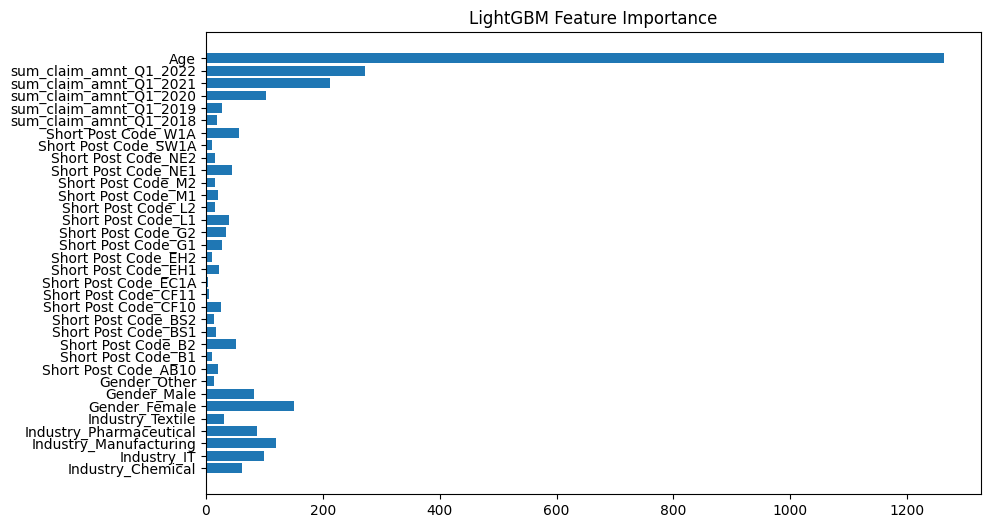

########################################################################################################################################################################################################
Features (X) head:
   Industry_Chemical  Industry_IT  Industry_Manufacturing  Industry_Pharmaceutical  Industry_Textile  Gender_Female  Gender_Male  Gender_Other  Short Post Code_AB10  Short Post Code_B1  Short Post Code_B2  Short Post Code_BS1  Short Post Code_BS2  Short Post Code_CF10  Short Post Code_CF11  Short Post Code_EC1A  Short Post Code_EH1  Short Post Code_EH2  Short Post Code_G1  Short Post Code_G2  Short Post Code_L1  Short Post Code_L2  Short Post Code_M1  Short Post Code_M2  Short Post Code_NE1  Short Post Code_NE2  Short Post Code_SW1A  Short Post Code_W1A  sum_claim_amnt_Q2_2018  sum_claim_amnt_Q2_2019  sum_claim_amnt_Q2_2020  sum_claim_amnt_Q2_2021  sum_claim_amnt_Q2_2022  Age
0              False        False                    True                    False             

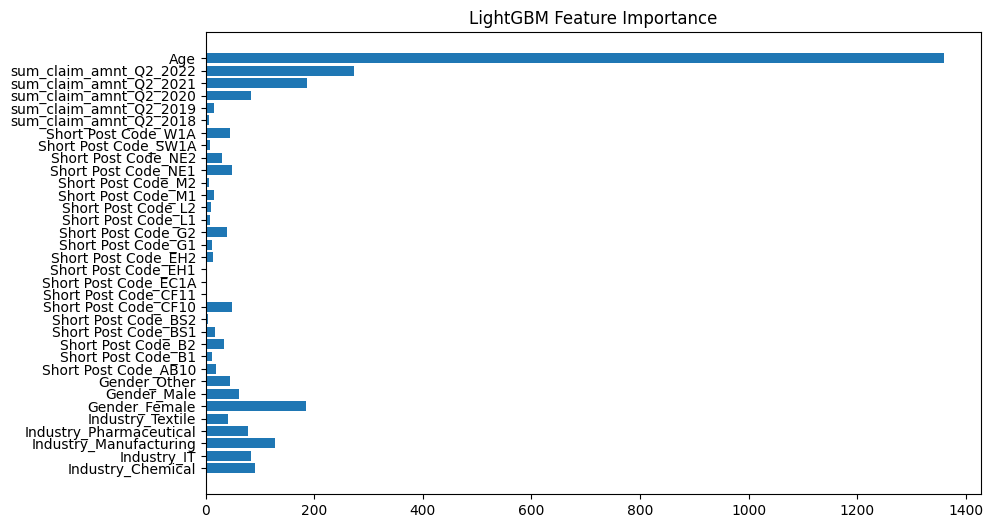

########################################################################################################################################################################################################
Features (X) head:
   Industry_Chemical  Industry_IT  Industry_Manufacturing  Industry_Pharmaceutical  Industry_Textile  Gender_Female  Gender_Male  Gender_Other  Short Post Code_AB10  Short Post Code_B1  Short Post Code_B2  Short Post Code_BS1  Short Post Code_BS2  Short Post Code_CF10  Short Post Code_CF11  Short Post Code_EC1A  Short Post Code_EH1  Short Post Code_EH2  Short Post Code_G1  Short Post Code_G2  Short Post Code_L1  Short Post Code_L2  Short Post Code_M1  Short Post Code_M2  Short Post Code_NE1  Short Post Code_NE2  Short Post Code_SW1A  Short Post Code_W1A  sum_claim_amnt_Q3_2018  sum_claim_amnt_Q3_2019  sum_claim_amnt_Q3_2020  sum_claim_amnt_Q3_2021  sum_claim_amnt_Q3_2022  Age
0              False        False                    True                    False             

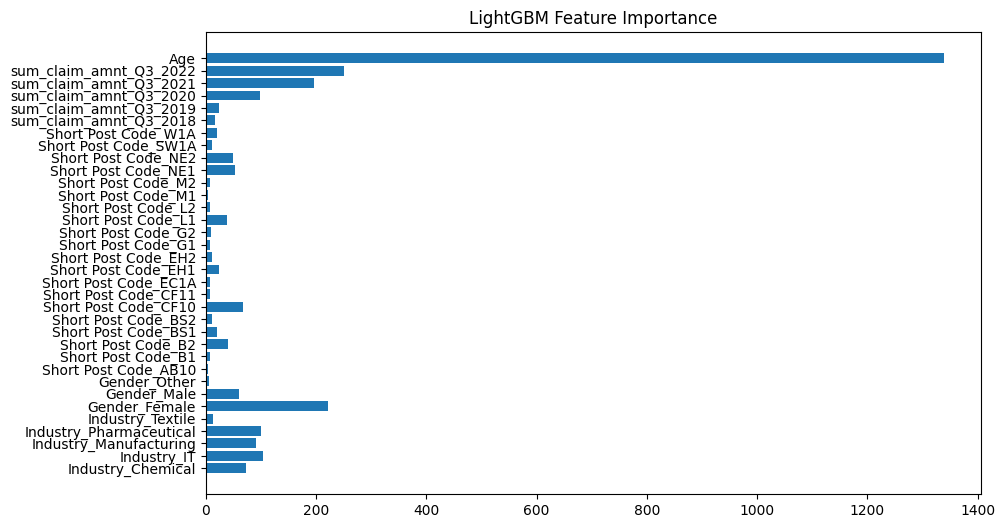

########################################################################################################################################################################################################
Features (X) head:
   Industry_Chemical  Industry_IT  Industry_Manufacturing  Industry_Pharmaceutical  Industry_Textile  Gender_Female  Gender_Male  Gender_Other  Short Post Code_AB10  Short Post Code_B1  Short Post Code_B2  Short Post Code_BS1  Short Post Code_BS2  Short Post Code_CF10  Short Post Code_CF11  Short Post Code_EC1A  Short Post Code_EH1  Short Post Code_EH2  Short Post Code_G1  Short Post Code_G2  Short Post Code_L1  Short Post Code_L2  Short Post Code_M1  Short Post Code_M2  Short Post Code_NE1  Short Post Code_NE2  Short Post Code_SW1A  Short Post Code_W1A  sum_claim_amnt_Q4_2018  sum_claim_amnt_Q4_2019  sum_claim_amnt_Q4_2020  sum_claim_amnt_Q4_2021  sum_claim_amnt_Q4_2022  Age
0              False        False                    True                    False             

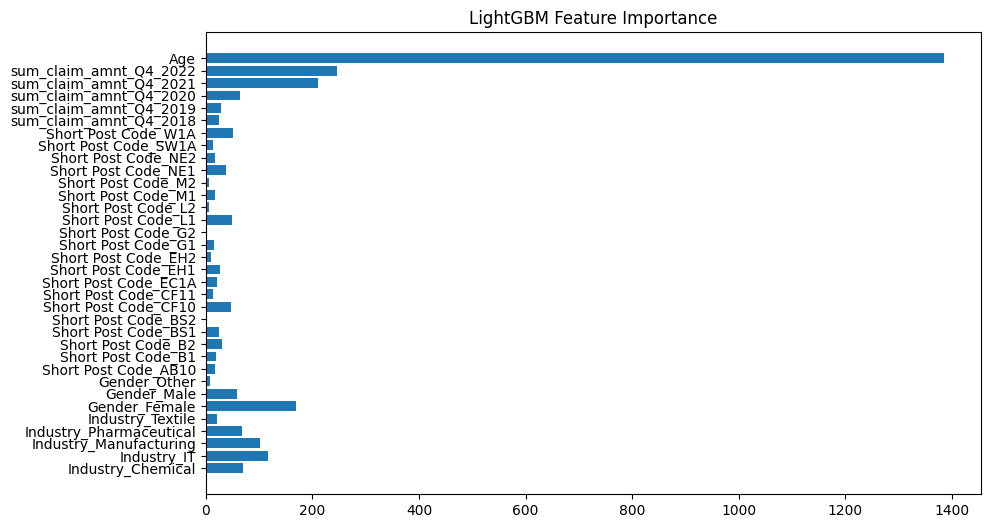

########################################################################################################################################################################################################


In [35]:
qtr_lst = [q1_cols,q2_cols,q3_cols,q4_cols]
for qtr in qtr_lst:
    # Load your dataset
    df = quarter_wise_result

    # Step 1: Handle outliers using IQR method
    claim_cols = qtr[:-1]
    for col in claim_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        q10 = df[col].quantile(0.10)
        q90 = df[col].quantile(0.90)
        df[col] = df[col].apply(lambda x: q10 if x < lower_bound else (q90 if x > upper_bound else x))

    # Step 2: One-hot encode categorical columns
    categorical_cols = ['Industry','Gender','Short Post Code']
    df_encoded = pd.get_dummies(df[categorical_cols])

    # Step 3: Combine features
    X = pd.concat([df_encoded, df[claim_cols + ['Age']]], axis=1)
    y = df[qtr[-1]]

    #printing X.head and y.head
    print("Features (X) head:")
    print(X.head())
    print("\nTarget (y) head:")
    print(y.head())

    # Step 4: Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


    lgb_model = LGBMRegressor(random_state=42)
    lgb_model.fit(X_train, y_train)
    lgb_pred = lgb_model.predict(X_test)


    print("LightGBM RMSE:", root_mean_squared_error(y_test, lgb_pred))
    print("LightGBM R²:", r2_score(y_test, lgb_pred))

    # Step 8: Feature importance visualization
    plt.figure(figsize=(10,6))
    plt.barh(X.columns, lgb_model.feature_importances_)
    plt.title("LightGBM Feature Importance")
    plt.show()

    print("#"*200)



[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000337 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 368
[LightGBM] [Info] Number of data points in the train set: 5378, number of used features: 34
[LightGBM] [Info] Start training from score 5332.520536
LightGBM RMSE: 29566.64562964011
LightGBM R²: 0.06740311654973474


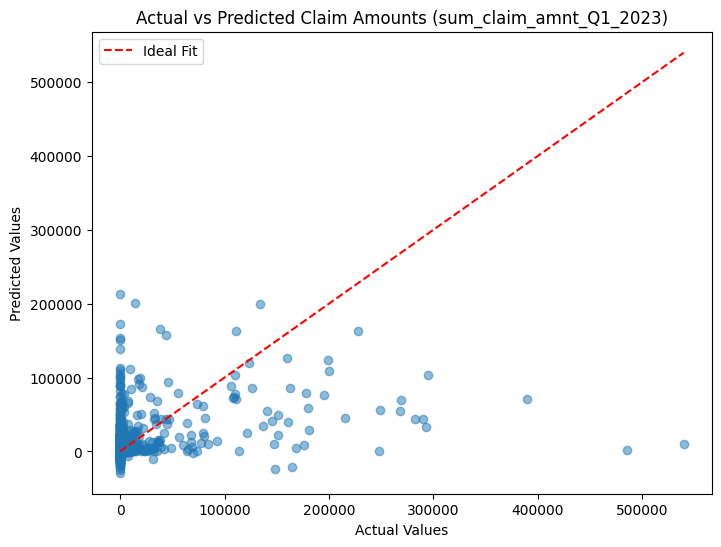

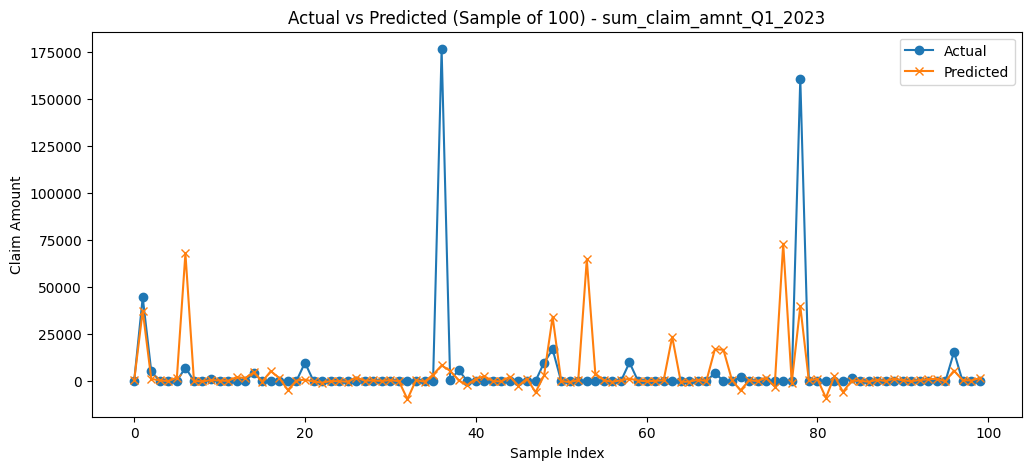

########################################################################################################################################################################################################
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000220 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 300
[LightGBM] [Info] Number of data points in the train set: 5378, number of used features: 34
[LightGBM] [Info] Start training from score 4670.507671
LightGBM RMSE: 22956.03465745228
LightGBM R²: 0.12881651162200902


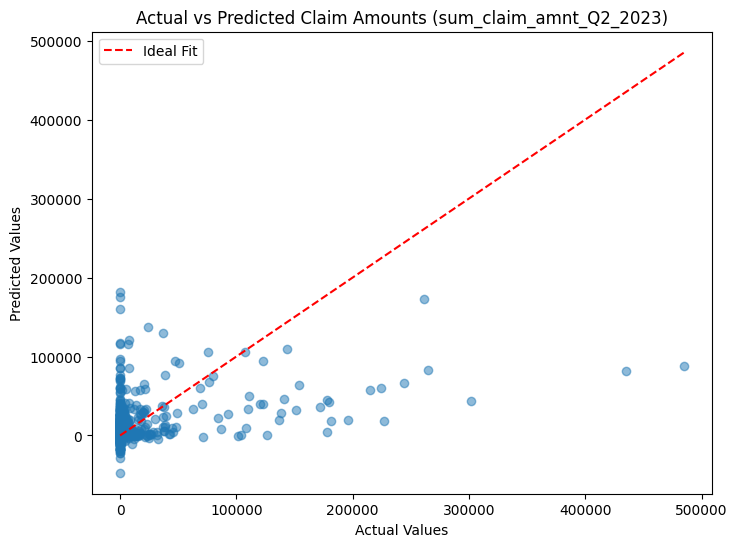

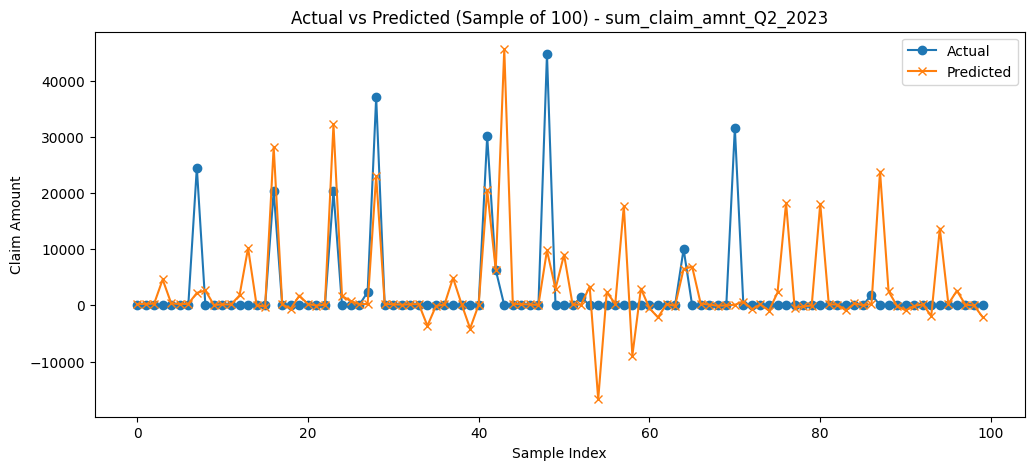

########################################################################################################################################################################################################
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000251 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 298
[LightGBM] [Info] Number of data points in the train set: 5378, number of used features: 34
[LightGBM] [Info] Start training from score 3438.117707
LightGBM RMSE: 20199.896938953756
LightGBM R²: 0.06264666701933086


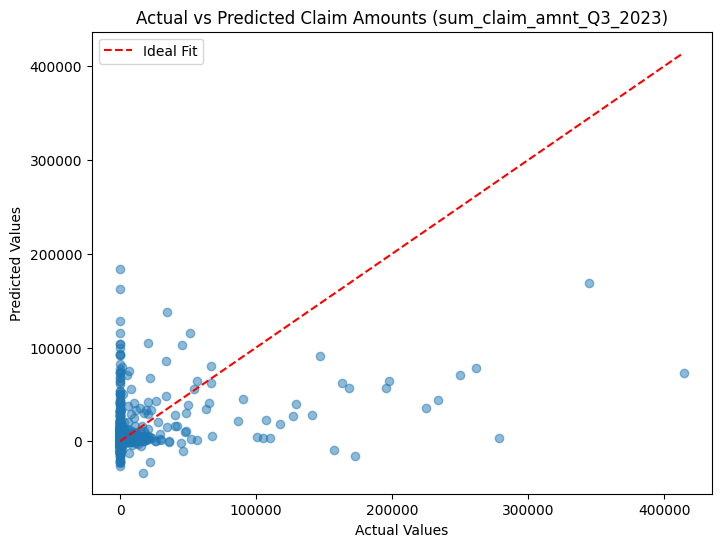

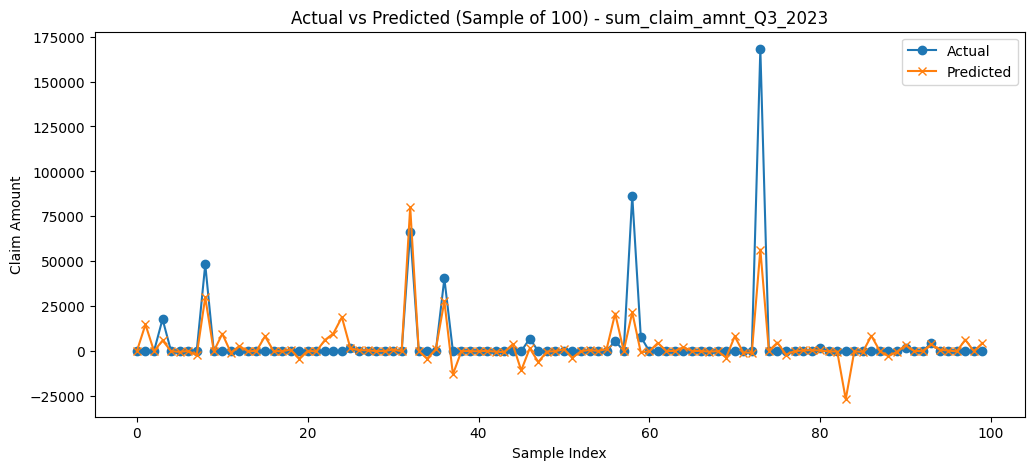

########################################################################################################################################################################################################
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001436 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 735
[LightGBM] [Info] Number of data points in the train set: 5378, number of used features: 34
[LightGBM] [Info] Start training from score 2764.827118
LightGBM RMSE: 18419.68642568923
LightGBM R²: 0.10875326247634731


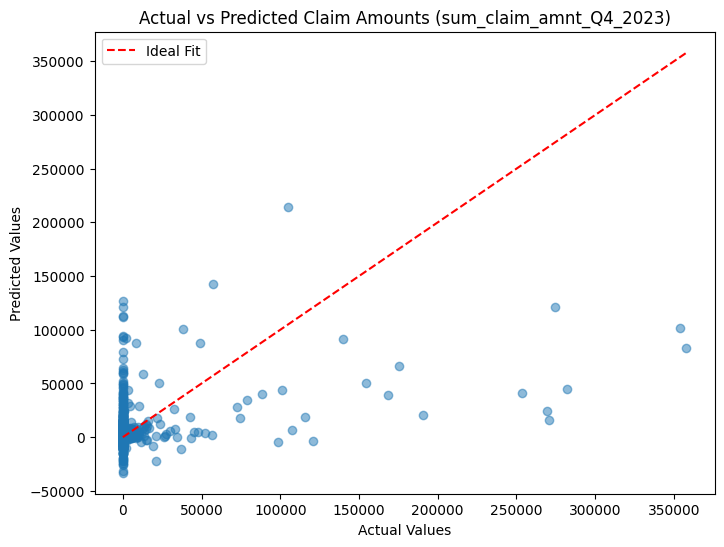

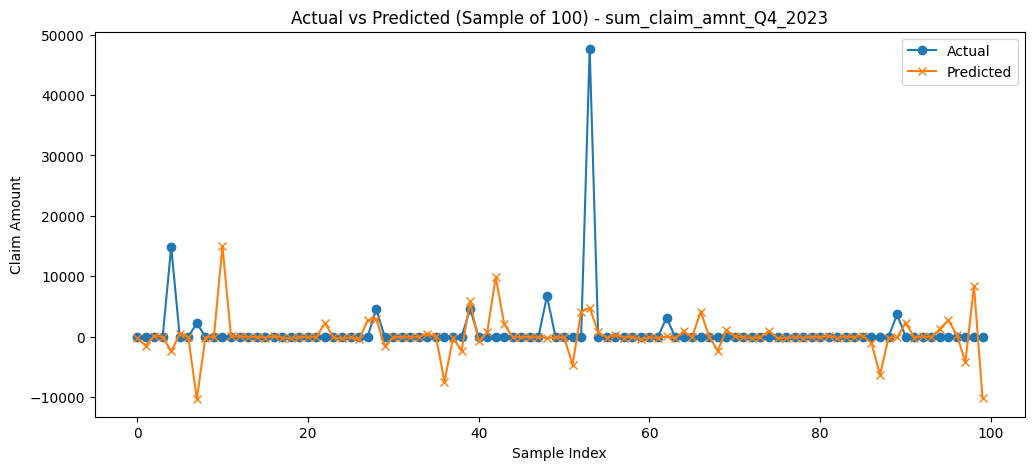

########################################################################################################################################################################################################


In [34]:
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

qtr_lst = [q1_cols, q2_cols, q3_cols, q4_cols]
for qtr in qtr_lst:
    # Load your dataset
    df = quarter_wise_result

    # Step 1: Handle outliers using IQR method
    claim_cols = qtr[:-1]
    for col in claim_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        q10 = df[col].quantile(0.10)
        q90 = df[col].quantile(0.90)
        df[col] = df[col].apply(lambda x: q10 if x < lower_bound else (q90 if x > upper_bound else x))

    # Step 2: One-hot encode categorical columns
    categorical_cols = ['Industry', 'Gender', 'Short Post Code']
    df_encoded = pd.get_dummies(df[categorical_cols])

    # Step 3: Combine features
    X = pd.concat([df_encoded, df[claim_cols + ['Age']]], axis=1)
    y = df[qtr[-1]]

    # Step 4: Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Step 5: Train LightGBM
    lgb_model = LGBMRegressor(random_state=42)
    lgb_model.fit(X_train, y_train)
    lgb_pred = lgb_model.predict(X_test)

    print("LightGBM RMSE:", root_mean_squared_error(y_test, lgb_pred))
    print("LightGBM R²:", r2_score(y_test, lgb_pred))

    # Step 6: Actual vs Prediction Visualization
    comparison_df = pd.DataFrame({'Actual': y_test.values, 'Predicted': lgb_pred})

    # Scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(comparison_df['Actual'], comparison_df['Predicted'], alpha=0.5)
    plt.plot([comparison_df['Actual'].min(), comparison_df['Actual'].max()],
             [comparison_df['Actual'].min(), comparison_df['Actual'].max()],
             color='red', linestyle='--', label='Ideal Fit')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Actual vs Predicted Claim Amounts ({qtr[-1]})')
    plt.legend()
    plt.show()

    # Line plot for a sample of 100
    comparison_df_sample = comparison_df.sample(100).sort_index()
    plt.figure(figsize=(12, 5))
    plt.plot(comparison_df_sample['Actual'].values, label='Actual', marker='o')
    plt.plot(comparison_df_sample['Predicted'].values, label='Predicted', marker='x')
    plt.title(f'Actual vs Predicted (Sample of 100) - {qtr[-1]}')
    plt.xlabel('Sample Index')
    plt.ylabel('Claim Amount')
    plt.legend()
    plt.show()

    print("#" * 200)
    

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000329 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 368
[LightGBM] [Info] Number of data points in the train set: 5378, number of used features: 34
[LightGBM] [Info] Start training from score 5332.520536
LightGBM RMSE: 29566.64562964011
LightGBM R²: 0.06740311654973474


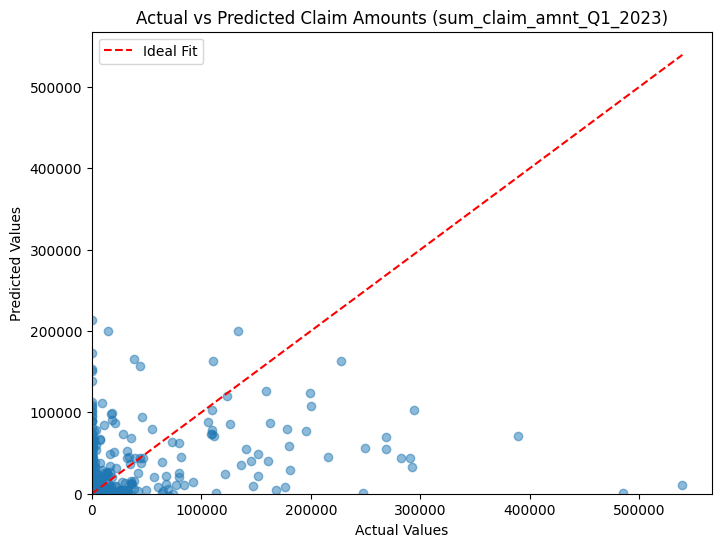

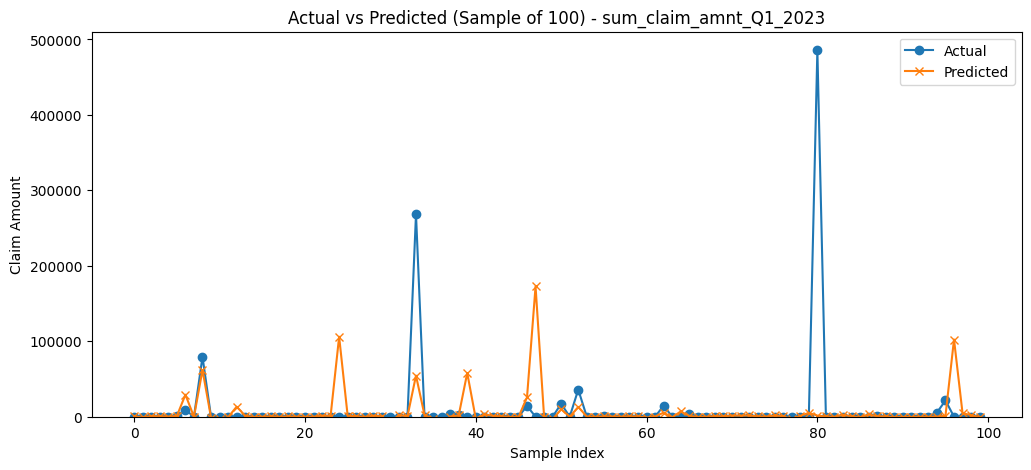

########################################################################################################################################################################################################
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000261 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 300
[LightGBM] [Info] Number of data points in the train set: 5378, number of used features: 34
[LightGBM] [Info] Start training from score 4670.507671
LightGBM RMSE: 22956.03465745228
LightGBM R²: 0.12881651162200902


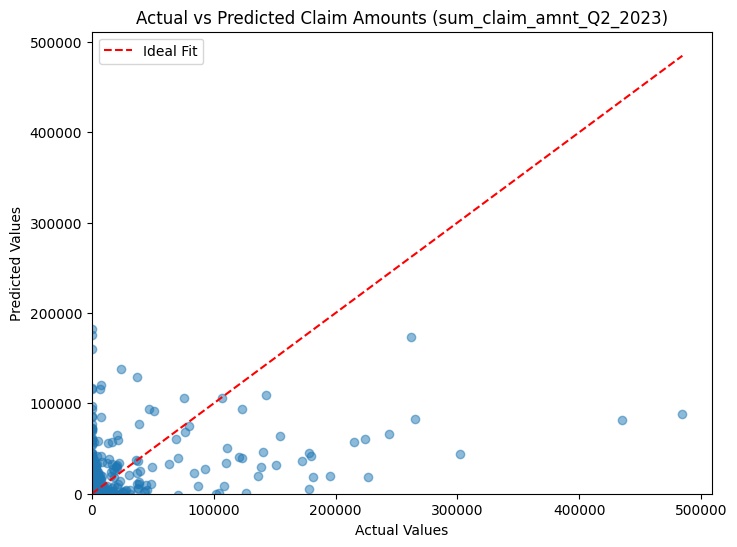

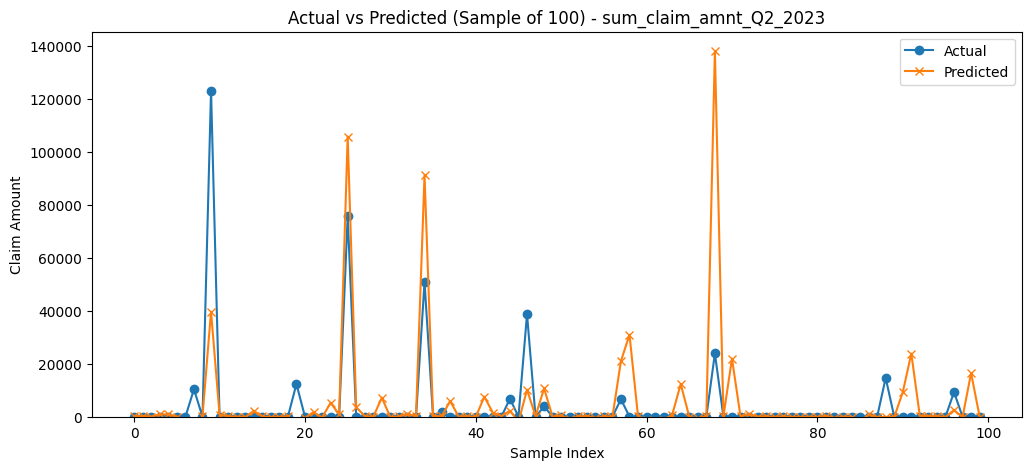

########################################################################################################################################################################################################
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000266 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 298
[LightGBM] [Info] Number of data points in the train set: 5378, number of used features: 34
[LightGBM] [Info] Start training from score 3438.117707
LightGBM RMSE: 20199.896938953756
LightGBM R²: 0.06264666701933086


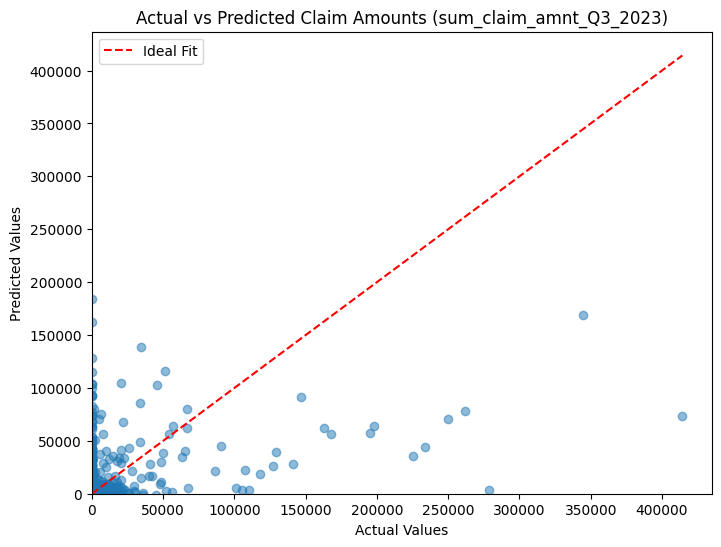

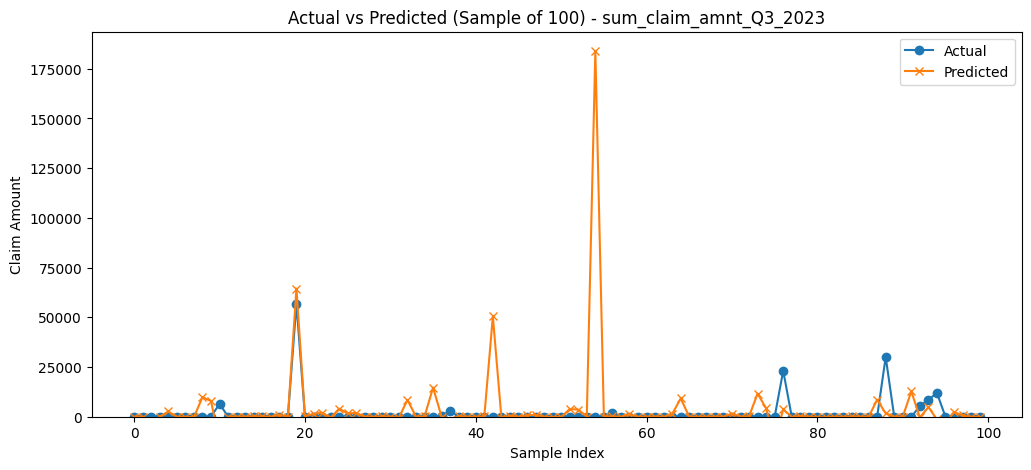

########################################################################################################################################################################################################
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000303 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 735
[LightGBM] [Info] Number of data points in the train set: 5378, number of used features: 34
[LightGBM] [Info] Start training from score 2764.827118
LightGBM RMSE: 18419.68642568923
LightGBM R²: 0.10875326247634731


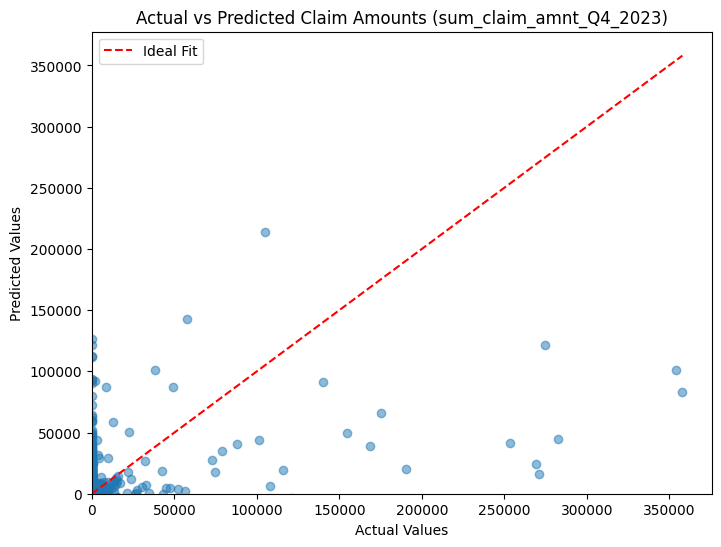

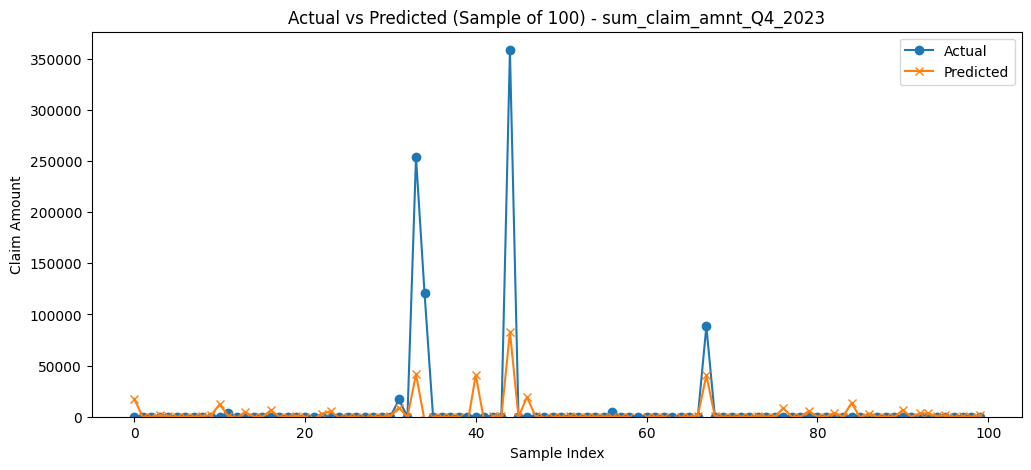

########################################################################################################################################################################################################


In [36]:
# ...existing code...

from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

qtr_lst = [q1_cols, q2_cols, q3_cols, q4_cols]
for qtr in qtr_lst:
    df = quarter_wise_result

    # Step 1: Handle outliers using IQR method
    claim_cols = qtr[:-1]
    for col in claim_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        q10 = df[col].quantile(0.10)
        q90 = df[col].quantile(0.90)
        df[col] = df[col].apply(lambda x: q10 if x < lower_bound else (q90 if x > upper_bound else x))

    categorical_cols = ['Industry', 'Gender', 'Short Post Code']
    df_encoded = pd.get_dummies(df[categorical_cols])

    X = pd.concat([df_encoded, df[claim_cols + ['Age']]], axis=1)
    y = df[qtr[-1]]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    lgb_model = LGBMRegressor(random_state=42)
    lgb_model.fit(X_train, y_train)
    lgb_pred = lgb_model.predict(X_test)

    print("LightGBM RMSE:", root_mean_squared_error(y_test, lgb_pred))
    print("LightGBM R²:", r2_score(y_test, lgb_pred))

    comparison_df = pd.DataFrame({'Actual': y_test.values, 'Predicted': lgb_pred})

    # Scatter plot with fixed axes starting at zero
    plt.figure(figsize=(8, 6))
    min_val = 0
    max_val = max(comparison_df['Actual'].max(), comparison_df['Predicted'].max())
    plt.scatter(comparison_df['Actual'], comparison_df['Predicted'], alpha=0.5)
    plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Ideal Fit')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Actual vs Predicted Claim Amounts ({qtr[-1]})')
    plt.xlim(left=0)
    plt.ylim(bottom=0)
    plt.legend()
    plt.show()

    # Line plot for a sample of 100 with fixed y-axis starting at zero
    comparison_df_sample = comparison_df.sample(100).sort_index()
    plt.figure(figsize=(12, 5))
    plt.plot(comparison_df_sample['Actual'].values, label='Actual', marker='o')
    plt.plot(comparison_df_sample['Predicted'].values, label='Predicted', marker='x')
    plt.title(f'Actual vs Predicted (Sample of 100) - {qtr[-1]}')
    plt.xlabel('Sample Index')
    plt.ylabel('Claim Amount')
    plt.ylim(bottom=0)
    plt.legend()
    plt.show()

    print("#" * 200)
# ...existing code...

In [37]:
print(f"The ideal fit line starts at ({min_val}, {min_val}) and ends at ({max_val}, {max_val})")

The ideal fit line starts at (0, 0) and ends at (357990.14, 357990.14)


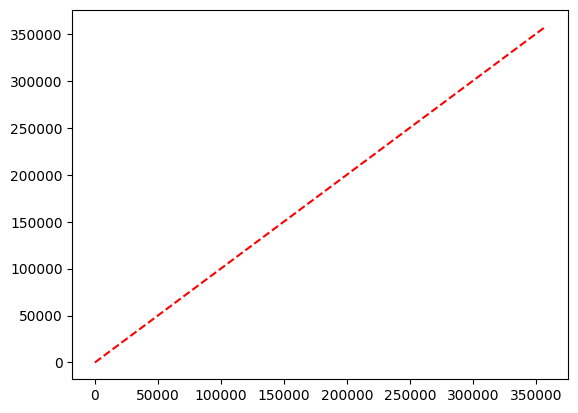

In [38]:
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Ideal Fit')